In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

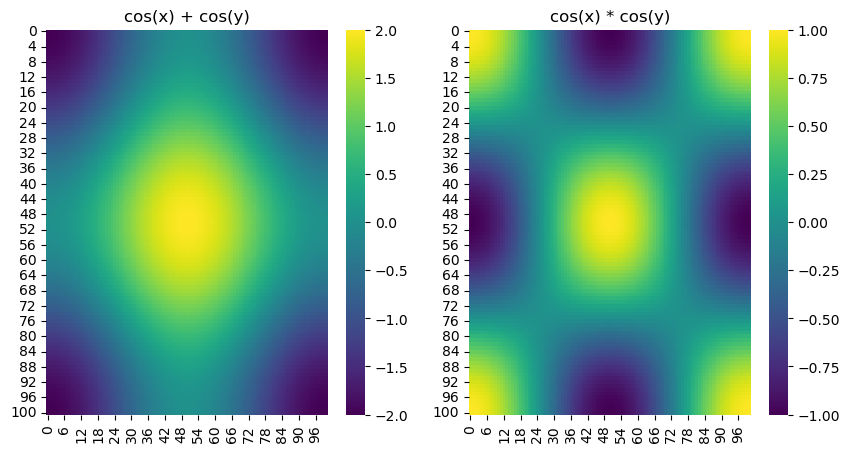

In [2]:
xs = np.linspace(-np.pi, np.pi, 101)
X, Y = np.meshgrid(xs, xs)
f1 = np.cos(X) + np.cos(Y)
f2 = np.cos(X) * np.cos(Y)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(f1, ax=ax[0], cmap='viridis')
sns.heatmap(f2, ax=ax[1], cmap='viridis')
ax[0].set_title('cos(x) + cos(y)')
ax[1].set_title('cos(x) * cos(y)')
plt.show()

In [2]:
colors = list(sns.color_palette(palette='magma'))

In [3]:
%matplotlib qt
colors = list(colors)
def rhs(u, eta=0):
    return eta - u * u

def rhs_pitchfork(u, eta=0):
    return eta * u - u ** 3

# plot phase diag
etas = [-0.3, 0.0, 0.3, 0.6, 0.9]
u = np.linspace(-1, 1, 101)
for k, eta in enumerate(etas):
    plt.plot(u, rhs(u, eta=eta), label=fr'$\eta = {eta}$', color=colors[k])

xlims = plt.xlim()
plt.hlines([0], *xlims, color='black', linestyle='dashed')
plt.xlim(-1, 1)
plt.legend()
plt.show()

In [5]:
etas = np.linspace(0, 1, 10001)
etas_lines = [-0.3, 0.0, 0.3, 0.6, 0.9]
# eta_plus = etas[etas > 0]
u_plus = np.sqrt(etas)
u_minus = -np.sqrt(etas)

plt.plot(etas, u_plus, linestyle='solid', color='black')
plt.plot(etas, u_minus, linestyle='dashed', color='black')
plt.vlines(etas_lines, -1, 1, colors=colors, linestyles='dotted')
plt.xlim(-0.5, 1)
plt.xticks(etas_lines)
plt.ylim(-1, 1)
plt.show()

In [4]:
%matplotlib qt
colors = list(colors)

def rhs_pitchfork(u, eta=0):
    return eta * u - u ** 3

# plot phase diag
etas = [-0.3, 0.0, 0.3, 0.6, 0.9]
u = np.linspace(-1, 1, 101)
for k, eta in enumerate(etas):
    plt.plot(u, rhs_pitchfork(u, eta=eta), label=fr'$\eta = {eta}$', color=colors[k])
    if eta > 0:
        plt.plot([-np.sqrt(eta), np.sqrt(eta)], [0, 0], 'ko')
plt.plot([0], [0], 'o', color='grey')

xlims = plt.xlim()
plt.hlines([0], *xlims, color='black', linestyle='dashed')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.legend()
plt.show()

In [13]:
%matplotlib qt
colors = list(colors)

def rhs_pitchfork_subcritical(u, eta=0):
    return eta * u + u ** 3 - u ** 5

# plot phase diag
u = np.linspace(-2, 2, 1001)
etas = u ** 4 - u ** 2
plt.plot(etas, u, linestyle='dashed')
plt.plot([-1.0, 0.0], [0.0] * 2, color='black', linestyle='solid')
plt.plot([0.0, 1.0], [0.0] * 2, color='black', linestyle='dashed')

plt.ylim(-1.14, 1.14)
plt.xlim(-0.4, 0.25)
plt.show()

In [32]:
etas_plus = np.linspace(0, 1, 10001)
etas_minus = np.linspace(-0.5, 0, 100, endpoint=False)
etas_lines = [-0.3, 0.0, 0.3, 0.6, 0.9]
# eta_plus = etas[etas > 0]
u_plus = np.sqrt(etas_plus)
u_minus = -np.sqrt(etas_plus)
plt.vlines(etas_lines, -1, 1, colors=colors, linestyles='dotted')
plt.plot(etas_minus, np.zeros_like(etas_minus), linestyle='solid', color='black')
plt.plot(etas_plus, np.zeros_like(etas_plus), linestyle='dashed', color='black')
plt.plot(etas_plus, u_plus, linestyle='solid', color='black')
plt.plot(etas_plus, u_minus, linestyle='solid', color='black')
for eta in etas_lines:
    if eta > 0:
        plt.plot([eta, eta], [-np.sqrt(eta), np.sqrt(eta)], 'ko')
        plt.plot([eta], [0], 'go')
    elif eta < 0:
        plt.plot([eta], [0], 'ko')
plt.xlim(-0.5, 1)
plt.xticks(etas_lines)
plt.ylim(-1, 1)
plt.show()

In [22]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
etas = np.array([-0.3, 0.0, 0.3, 0.6, 0.9])
u = np.linspace(-1, 1, 101)
plt.plot(np.zeros_like(etas), etas, zs=np.zeros_like(etas), linestyle='dashed')

for k, eta in enumerate(etas):
    plt.plot(u, [eta]*len(u), zs=rhs_pitchfork(u, eta=eta), zdir='z', label=fr'$\eta = {eta}$', color=colors[k])


In [4]:
(17.750 - 10.360) + 17.750

25.14

In [24]:
from scipy.integrate import solve_ivp

In [36]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[len(xdata) // 2]
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )


In [62]:
colors = list(sns.color_palette('husl', n_colors=20))

In [81]:
eta = -0.3
omega = 1.0
def rhs(t, A):
    return [(eta + 1j * omega) * A - A * np.abs(A) ** 2]

x = np.linspace(-1, 1, 6)
print(x)
thetas = np.linspace(0, 2*np.pi, 101, endpoint=True)
y = x
X, Y = np.meshgrid(x, y)
# dA = rhs(X + 1j * Y)
fig, ax = plt.subplots(figsize=(5, 5))
# plt.streamplot(X, Y, dA.real, dA.imag, density=1.0)
ts = np.linspace(0, 10, 101)
k = 0
for xi in x:
    for yi in y:
        sol = solve_ivp(rhs, (ts[0], ts[-1]), [xi + 1j * yi], t_eval=ts).y
        line, = plt.plot(sol[0].real, sol[0].imag, color=colors[k % len(colors)])
        add_arrow(line, position=sol[0, 5].real, direction='right')
        k += 1
# if eta > 0:
#     plt.plot(np.sqrt(eta) * np.cos(thetas),  np.sqrt(eta) * np.sin(thetas), 'k')
plt.axis('equal')
plt.xlim(-1, 1) 
plt.ylim(-1, 1)
plt.show()

[-1.  -0.6 -0.2  0.2  0.6  1. ]


: 

In [3]:
### supercritical hopf bifurcation
np.sqrt(0.3)

0.5477225575051661

In [28]:
%matplotlib qt
etas_minus = np.linspace(-0.25, 0, 1001)
etas_plus = np.linspace(-0.25, 2, 10_001)
rs_lin = np.linspace(0, 1, 101)
etas_inv = rs_lin ** 4 - rs_lin ** 2

# plt.plot(etas_inv, rs_lin)
r_plus = np.sqrt(0.5 * (1 + np.sqrt(1 + 4 * etas_plus)))
r_minus = np.sqrt(0.5 * (1 - np.sqrt(1 + 4 * etas_minus)))

plt.plot(etas_plus, r_plus, 'k')
plt.plot(etas_minus, r_minus, 'k--')
plt.plot([-1, 0.0], [0, 0], 'k')
plt.plot([0.0, 1.0], [0, 0], 'k--')

plt.xlim((-0.4, 0.3))
plt.ylim((-0.05, 1.1))

plt.show()

In [38]:
#%matplotlib qt
# SUPERCRITICAL HOPF #

etas_minus = np.linspace(0, 1.0, 1001)
# etas_plus = np.linspace(-0.25, 2, 10_001)
# rs_lin = np.linspace(0, 1, 101)
# etas_inv = rs_lin ** 4 - rs_lin ** 2

# plt.plot(etas_inv, rs_lin)
r = np.sqrt(etas_minus)

plt.plot(etas_minus, r, 'k')
# plt.plot(etas_minus, r_minus, 'k--')
plt.plot([-1, 0.0], [0, 0], 'k')
plt.plot([0.0, 1.0], [0, 0], 'k--')

plt.xlim((-0.6, 1.0))
plt.ylim((-0.05, 1.1))

plt.show()